In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn 

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib as mp
import sklearn as sk

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
# from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [7]:
X_train = pd.read_csv(r'./data/train.csv', index_col='PassengerId')
X_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [8]:
X_test = pd.read_csv(r'./data/test.csv', index_col='PassengerId')
X_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [9]:
X_survived = pd.read_csv(r'./data/gender_submission.csv', index_col='PassengerId')
X_survived

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [10]:
X_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# Data preparing

In [12]:
X_train['Survived'] = X_train['Survived'].astype('float64')

In [13]:
X_train.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
451,0.0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S
120,0.0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
828,1.0,2,"Mallet, Master. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,NaN,C
644,1.0,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
154,0.0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S


In [14]:
X_train.loc[(X_train['Sex'] == 'male'), 'Sex'] = 0
X_train.loc[(X_train['Sex'] == 'female'), 'Sex'] = 1
X_train['Sex'] = X_train['Sex'].astype('float64')

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    float64
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 83.5+ KB


In [16]:
X_train.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
235,0.0,2,"Leyson, Mr. Robert William Norman",0.0,24.0,0,0,C.A. 29566,10.50,NaN,S
243,0.0,2,"Coleridge, Mr. Reginald Charles",0.0,29.0,0,0,W./C. 14263,10.50,NaN,S
561,0.0,3,"Morrow, Mr. Thomas Rowan",0.0,NaN,0,0,372622,7.75,NaN,Q
526,0.0,3,"Farrell, Mr. James",0.0,40.5,0,0,367232,7.75,NaN,Q
869,0.0,3,"van Melkebeke, Mr. Philemon",0.0,NaN,0,0,345777,9.50,NaN,S


In [17]:
X_train['Age'] = X_train['Age'].fillna(0)
X_train.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
586,1.0,1,"Taussig, Miss. Ruth",1.0,18.0,0,2,110413,79.650,E68,S
118,0.0,2,"Turpin, Mr. William John Robert",0.0,29.0,1,0,11668,21.000,NaN,S
8,0.0,3,"Palsson, Master. Gosta Leonard",0.0,2.0,3,1,349909,21.075,NaN,S
298,0.0,1,"Allison, Miss. Helen Loraine",1.0,2.0,1,2,113781,151.550,C22 C26,S
149,0.0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",0.0,36.5,0,2,230080,26.000,F2,S


In [18]:
X_train.loc[(X_train['Sex'] == 0), 'Age'].median()

25.0

In [19]:
# Replace nulleble age on median age by sex
X_train.loc[(X_train['Age'] == 0) & (X_train['Sex'] == 0), 'Age'] = X_train.loc[(X_train['Sex'] == 0) & (X_train['Age'] != 0), 'Age'].median()
X_train.loc[(X_train['Age'] == 0) & (X_train['Sex'] == 1), 'Age'] = X_train.loc[(X_train['Sex'] == 1) & (X_train['Age'] != 0), 'Age'].median()
X_train.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
697,0.0,3,"Kelly, Mr. James",0.0,44.0,0,0,363592,8.0500,NaN,S
585,0.0,3,"Paulner, Mr. Uscher",0.0,29.0,0,0,3411,8.7125,NaN,C
577,1.0,2,"Garside, Miss. Ethel",1.0,34.0,0,0,243880,13.0000,NaN,S
598,0.0,3,"Johnson, Mr. Alfred",0.0,49.0,0,0,LINE,0.0000,NaN,S
396,0.0,3,"Johansson, Mr. Erik",0.0,22.0,0,0,350052,7.7958,NaN,S


In [20]:
# Можно заморочиться, присвоить Cabin_Letter первую букву номером (A=1, B=2, ...) и Cabin_number соответственно оставшийся номер, но пожалуй не буду)
X_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [21]:
# C = Cherbourg = 1, Q = Queenstown = 2, S = Southampton= 3
X_train.loc[(X_train['Embarked'] == 'C'), 'Embarked'] = 1
X_train.loc[(X_train['Embarked'] == 'Q'), 'Embarked'] = 2
X_train.loc[(X_train['Embarked'] == 'S'), 'Embarked'] = 3

X_train['Embarked'] = X_train['Embarked'].astype('float64')

In [22]:
X_train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.073296,-0.035322,0.081629,0.257307,-0.169718
Pclass,-0.338481,1.000000,-0.131900,-0.338056,0.083081,0.018443,-0.549500,0.164681
Sex,0.543351,-0.131900,1.000000,-0.095256,0.114631,0.245489,0.182333,-0.110320
Age,-0.073296,-0.338056,-0.095256,1.000000,-0.236376,-0.176038,0.094161,-0.020497
SibSp,-0.035322,0.083081,0.114631,-0.236376,1.000000,0.414838,0.159651,0.068900
Parch,0.081629,0.018443,0.245489,-0.176038,0.414838,1.000000,0.216225,0.040449
Fare,0.257307,-0.549500,0.182333,0.094161,0.159651,0.216225,1.000000,-0.226311
Embarked,-0.169718,0.164681,-0.110320,-0.020497,0.068900,0.040449,-0.226311,1.000000


In [23]:
X_train.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
226,0.0,3,"Berglund, Mr. Karl Ivar Sven",0.0,22.0,0,0,PP 4348,9.3500,NaN,3.0
592,1.0,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",1.0,52.0,1,0,36947,78.2667,D20,1.0
754,0.0,3,"Jonkoff, Mr. Lalio",0.0,23.0,0,0,349204,7.8958,NaN,3.0
32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",1.0,27.0,1,0,PC 17569,146.5208,B78,1.0
873,0.0,1,"Carlsson, Mr. Frans Olof",0.0,33.0,0,0,695,5.0000,B51 B53 B55,3.0


In [24]:
# Удаляем из датасета строки, в которых недостаточно данных для обучения.
# X_train.dropna(axis=0, subset=['Cabin', 'Ticket', 'Name'], inplace=True) # Не подходит ибо в данном случае удалит только из указанных колонок
# X_train.dropna(axis=0, inplace=True)
# Разбиваем датасет на цель (y) и входные данные (X)
y = X_train['Survived']
X_train.drop(['Survived', 'Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

# Разбиваем датасет на train/val
X_train_t, X_train_v, y_train, y_valid = train_test_split(X_train, y, 
                                                          train_size=0.8, 
                                                          test_size=0.2,
                                                          random_state=0)

In [25]:
X_train_t.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
417,2,1.0,34.0,1,1,32.5000,3.0
776,3,0.0,18.0,0,0,7.7500,3.0
511,3,0.0,29.0,0,0,7.7500,2.0
259,1,1.0,35.0,0,0,512.3292,1.0
590,3,0.0,29.0,0,0,8.0500,3.0


In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    float64
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 55.7 KB


In [27]:
print(len(X_train_t.columns), len(X_train.columns))
X_train_t.head()

7 7


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
141,3,1.0,27.0,0,2,15.2458,1.0
440,2,0.0,31.0,0,0,10.5000,3.0
818,2,0.0,31.0,1,1,37.0042,1.0
379,3,0.0,20.0,0,0,4.0125,1.0
492,3,0.0,21.0,0,0,7.2500,3.0


# Pipeline

### Data preparation (preprocessing)

In [28]:
len(X_train_t)

712

In [29]:
# По идее мне все это не нужно ибо я сделал уже это выше

In [30]:
# В наших данных есть нечисловые значения. Они затрудняют обработку
# поэтому мы оставим только те данные, где нечисловые значения имеют меньше 10 разных значений

# categorical_cols = [cname for cname in X_train_t.columns if
#                     X_train_t[cname].nunique() < 10 and 
#                     X_train_t[cname].dtype == "object"]

# и все числовые данные
numerical_cols = [cname for cname in X_train_t.columns if 
                X_train_t[cname].dtype in ['int64', 'float64']]

In [31]:
# Инициализируем препроцессор для заполнения недостающих числовых значений
numerical_transformer = SimpleImputer(strategy='median')

# Инициализируем препроцессор для заполнения недостающих НЕ числовых значений
# Добавляем шаг кодирования НЕ числовых значений в числовые
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Создаем общий препроцессор данных, соединив первые два
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        # ('cat', categorical_transformer, categorical_cols)
    ])

### Model

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [33]:
# Инициализируем модель
model = GradientBoostingRegressor(n_estimators=100, random_state=0)

In [34]:
# Создаем пайплайн из модели и препроцессора
classifier = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)],
                      verbose=True)

# Training

In [35]:
# Передаем обучающие данные в пайплайн, обучаем
classifier.fit(X_train_t, y_train)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.1s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Pclass', 'Sex', 'Age',
                                                   'SibSp', 'Parch', 'Fare',
                                                   'Embarked'])])),
                ('model', GradientBoostingRegressor(random_state=0))],
         verbose=True)

### Model evaluation

In [36]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [37]:
X_survived.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  418 non-null    int64
dtypes: int64(1)
memory usage: 6.5 KB


In [38]:
X_test.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)
X_test.loc[(X_test['Sex'] == 'male'), 'Sex'] = 0
X_test.loc[(X_test['Sex'] == 'female'), 'Sex'] = 1
X_test['Sex'] = X_test['Sex'].astype('float64')

# C = Cherbourg = 1, Q = Queenstown = 2, S = Southampton= 3
X_test.loc[(X_test['Embarked'] == 'C'), 'Embarked'] = 1
X_test.loc[(X_test['Embarked'] == 'Q'), 'Embarked'] = 2
X_test.loc[(X_test['Embarked'] == 'S'), 'Embarked'] = 3

X_test['Embarked'] = X_test['Embarked'].astype('float64')

In [39]:
# Передаем валидационные данные в пайплайн, получаем предсказания
preds = classifier.predict(X_test)

# Оцениваем точность модели
print('MAE:', mean_absolute_error(X_survived, preds)) 

MAE: 0.23962356759084813


### Visualisation output

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
preds

array([ 0.1074462 ,  0.09629536, -0.03497362,  0.18734518,  0.44531191,
        0.58414145, -0.14423214,  0.2113903 ,  0.86997991,  0.00268298,
        0.08782195,  0.13027239,  0.93107536, -0.06408805,  0.87180942,
        0.8624926 ,  0.14435207,  0.16352564,  0.544554  ,  0.30511193,
        0.29683584,  0.45535293,  0.93689396,  0.35817619,  0.9276831 ,
        0.04335053,  0.97513387,  0.17230352,  0.3956173 ,  0.12894976,
        0.07857618,  0.19204456,  0.36534969,  0.17103674,  0.38671358,
        0.1633498 ,  0.31336387,  0.36879754,  0.08211154,  0.30572863,
        0.13738188,  0.49991257,  0.11817354,  0.84526073,  1.0168862 ,
        0.11281525,  0.17007876,  0.14512915,  0.88256468,  0.42271201,
        0.29257553,  0.25386642,  0.76810199,  0.89726043,  0.17880913,
        0.04164498,  0.08188564,  0.07849157,  0.10609443,  0.99504559,
        0.11525048,  0.22027816,  0.12386247,  0.78390249,  0.65091009,
        0.83387742,  0.82591668,  0.12319157,  0.31265374,  0.88

In [47]:
X_test.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1196,3,1.0,NaN,0,0,7.7500,2.0
969,1,1.0,55.0,2,0,25.7000,3.0
949,3,0.0,25.0,0,0,7.6500,3.0
1255,3,0.0,27.0,0,0,8.6625,3.0
1215,1,0.0,33.0,0,0,26.5500,3.0


In [61]:
X_test['P_Survived'] = preds
X_test['P_Survived'] = X_test['P_Survived'].round(0)
X_test.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,P_Survived
PassengerId,,,,,,,,
1026,3,0.0,43.0,0,0,7.8958,3.0,0.0
1266,1,1.0,54.0,1,1,81.8583,3.0,1.0
964,3,1.0,29.0,0,0,7.9250,3.0,0.0
1111,3,0.0,NaN,0,0,8.0500,3.0,0.0
923,2,0.0,24.0,2,0,31.5000,3.0,0.0


In [65]:
X = X_test.merge(X_survived, on=["PassengerId"])

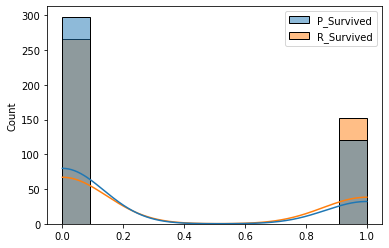

In [67]:
# Соотношение выживших предсказанных и реально
sns.histplot(data = {"P_Survived": X_test['P_Survived'],
                     "R_Survived": X_survived['Survived']
}, 
             kde=True)
plt.show()

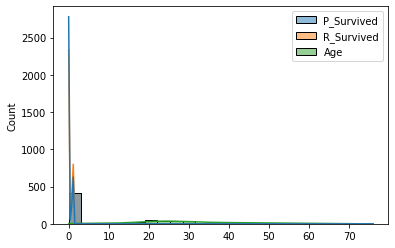

In [70]:
# Соотношение выживших предсказанных и реально
sns.histplot(data = {"P_Survived": X['P_Survived'],
                     "R_Survived": X['Survived'],
                     "Age": X['Age']
}, 
             kde=True)
plt.show()

In [88]:
X_survived = X.loc[(X['P_Survived'] == 1), ['Age', 'P_Survived', 'Survived', 'Pclass', 'Embarked', 'Fare', 'Parch', 'Sex']]
X_dnt_survived = X.loc[(X['P_Survived'] == 0), ['Age', 'P_Survived', 'Survived', 'Pclass', 'Embarked', 'Fare', 'Parch', 'Sex']]

In [89]:
X_survived.sample(5)

,Age,P_Survived,Survived,Pclass,Embarked,Fare,Parch,Sex
PassengerId,,,,,,,,
1263,31.00,1.0,1,1,1.0,134.5000,0,1.0
1207,17.00,1.0,1,3,2.0,7.7333,0,1.0
1289,48.00,1.0,1,1,1.0,79.2000,1,1.0
1266,54.00,1.0,1,1,3.0,81.8583,1,1.0
1246,0.17,1.0,1,3,3.0,20.5750,2,1.0


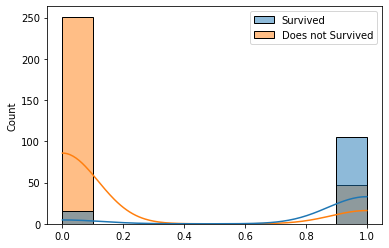

In [90]:
# Survived by sex
sns.histplot(
        data={
            'Survived': X_survived['Sex'],
            'Does not Survived': X_dnt_survived['Sex']
        },
        kde=True
)

plt.show()

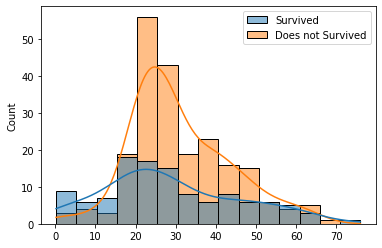

In [91]:
# Survived by age
sns.histplot(
        data={
            'Survived': X_survived['Age'],
            'Does not Survived': X_dnt_survived['Age']
        },
        kde=True
)

plt.show()

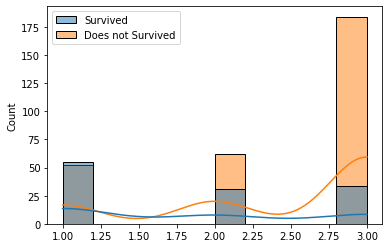

In [81]:
# Survived by Class
sns.histplot(
        data={
            'Survived': X_survived['Pclass'],
            'Does not Survived': X_dnt_survived['Pclass']
        },
        kde=True
)

plt.show()

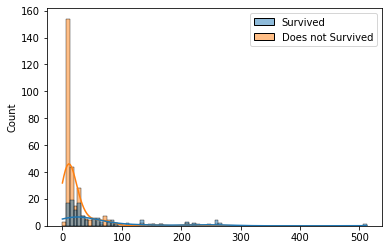

In [84]:
# Survived by passanger fare
sns.histplot(
        data={
            'Survived': X_survived['Fare'],
            'Does not Survived': X_dnt_survived['Fare']
        },
        kde=True
)

plt.show()

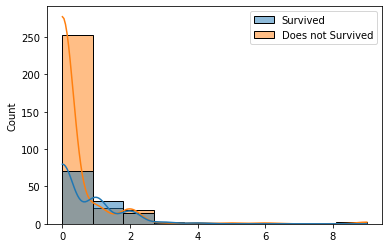

In [85]:
# Survived by avalibillity of parents or children aboard
sns.histplot(
        data={
            'Survived': X_survived['Parch'],
            'Does not Survived': X_dnt_survived['Parch']
        },
        kde=True
)

plt.show()